## Analyze Individual Trajectories

### Import basics and `Trajectory` Module

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# import my functions from the sup folder
from bkg_functions.trajectory_class import Trajectory, ComputeParameterDistribution
from bkg_functions.sup_func import read_trackmate_xml_tracks
from bkg_functions.trajectory_MultiColorLine import multicolored_lines, colorline

### Read XML file

In [62]:
# reads xml into a table; extract table with all info regarding tracks, frame rate and total number of tracks
traj_file = 'dataset_examples/multiple_tracks_example.xml'
traj_table, traj_rate, traj_ntracks = read_trackmate_xml_tracks(traj_file)
print('{} tracks, frame rate {}'.format(traj_ntracks, traj_rate))

3756.0 tracks, frame rate 2.0


## Individual Tracks: Visual Examination 

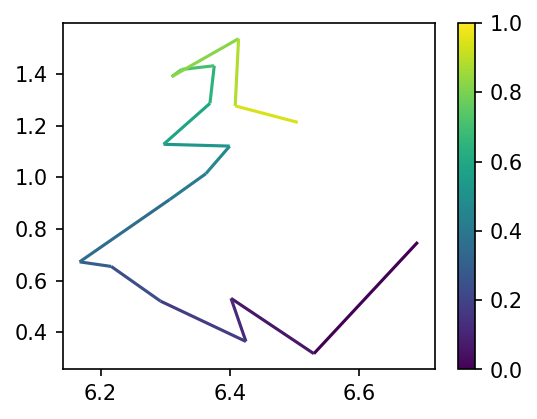

In [63]:
Track_ID = 190
my_track = traj_table[traj_table.TRACK_ID == Track_ID]

fig, ax = plt.subplots(figsize=(4, 3), dpi=150)
multicolored_lines(my_track['POSITION_X'], my_track['POSITION_Y'], cmap='viridis', bar=True)
ax.set_title(f"Track ID: {Track_ID}")
ax.set_xlabel("Position X")
ax.set_ylabel("Position Y")
plt.show()

## Individual Tracks: Quantitative Analysis

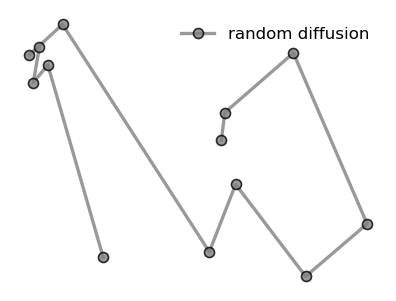

(0.25867973887472495, 1.8292969474409935, 0.14140937546339455)

In [64]:
# select track of interest
track_ID = 32

# apply 'trajectory' package (Class)
track = traj_table[traj_table.TRACK_ID == track_ID]
X,Y = track.POSITION_X, track.POSITION_Y

myTrack = Trajectory(X,Y, step_rate = traj_rate) # where the magic happens ... background

# check trajectory type
myTrack.plot_trajectory()

#check total displacement, distance and directionality ratio
myTrack.displacement(), myTrack.distance(), myTrack.directionality()

In [65]:
# get more info directly from the trajectory -- check documentation for more
myTrack.step_velocity(), myTrack.n_points, myTrack.step_rate

(0.07622070614337473, 13, 2.0)

#### check msd curve and parameters

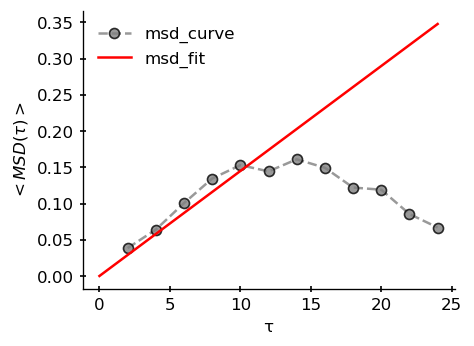

'diffusion coefficient = 0.0036'

In [66]:
myTrack.msd_plot()
myTrack.msd_param

In [67]:
# more info from the MSD -- check documentation for more
myTrack.msd_alpha, myTrack.msd_mode

(0.813604623285674, 'random diffusion')

#### check angle distribution

C:\Users\paulo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\paulo\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


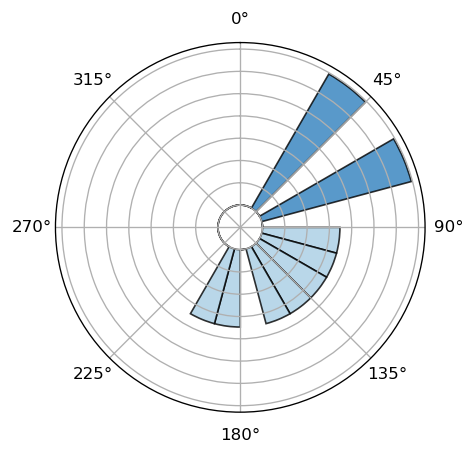

In [68]:
myTrack.plot_angle_ori();

## Analyze Multiple Tracks

* Rationale: for all tracks apply 'Trajectory' package --> extract the desired parameter distribution into an array
* Note this is not computationally effcient, just an easy way for non-programmers to get numbers effortlessly

* parameters: **'msd_alpha', 'msd_directed_velocity', 'length', 'displacement', 'directionality', 'step_velocity'**


In [ ]:
# e.g get alpha distribution (scalling factor of msd) for all tracks
alphas = ComputeParameterDistribution(traj_table, traj_rate, param = 'msd_alpha', clip = 501)

In [ ]:
# e.g get step velocitities for all tracks
step_vels = ComputeParameterDistribution(traj_table, traj_rate, param = 'step_velocity', clip = 501)

In [ ]:
# plot pretty stuff and have fun!

fig, ax = plt.subplots(figsize = (4,3), dpi = 120)

plt.hist(alphas, density = True, color = 'steelblue', alpha = 0.8, edgecolor = 'black');
plt.xlabel('msd alpha parameter'); plt.ylabel('PDF'); 

fig, ax = plt.subplots(figsize = (4,3), dpi = 120)
plt.hist(step_vels, density = True, color = 'crimson', alpha = 0.8, edgecolor = 'black');
plt.xlabel('step velocities'); plt.ylabel('PDF');

<hr>